Blink Peaks Detected at Indices: [  14   64  119  196  507  925 1403 1845 2161 2287 2655 2758 2789 2854
 2880 2917 2967 2995 3019 3075]


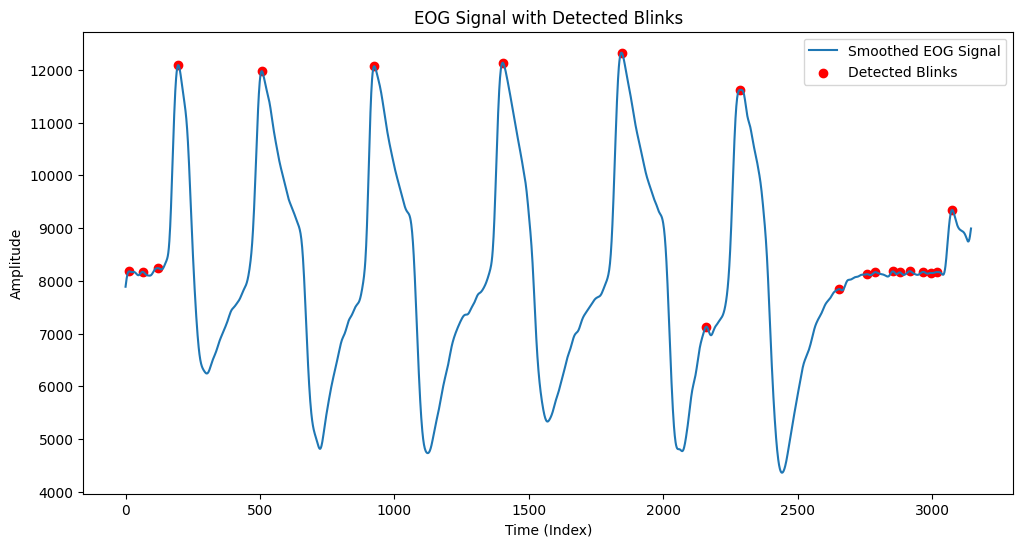

In [ ]:
# Using only find_peaks method to detect peaks- detects some noise as well with the actual blinks.
import pandas as pd
import numpy as np
from scipy.signal import find_peaks, butter, filtfilt
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('eog_sample.csv', skiprows=2)

# Extract the Channel1 data
eog_signal = data['Channel1']

# Preprocess the signal: low-pass filter
def low_pass_filter(data, cutoff=10, fs=250, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

smoothed_signal = low_pass_filter(eog_signal, cutoff=10, fs=250)

# Detect peaks
blink_peaks, _ = find_peaks(smoothed_signal, height=0.5, distance=20)

print("Blink Peaks Detected at Indices:", blink_peaks)

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(smoothed_signal, label='Smoothed EOG Signal')
plt.scatter(blink_peaks, smoothed_signal[blink_peaks], color='red', label='Detected Blinks')
plt.legend()
plt.xlabel('Time (Index)')
plt.ylabel('Amplitude')
plt.title('EOG Signal with Detected Blinks')
plt.show()

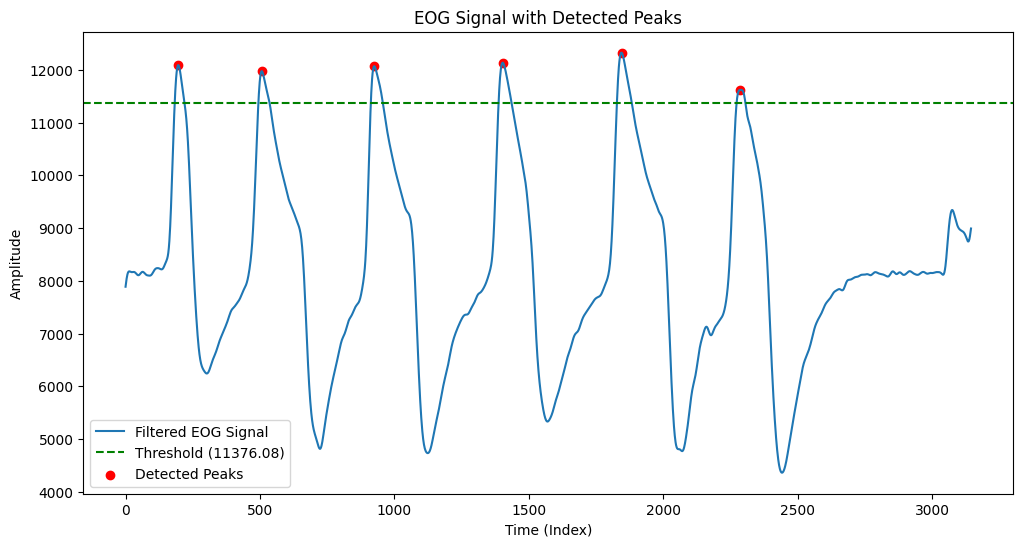

Detected Peaks (Indices): [196, 507, 925, 1403, 1845, 2287]
Peak Times (seconds): [0.392, 1.014, 1.85, 2.806, 3.69, 4.574]


In [2]:
# Use the threshold criteria to detect the peaks
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('eog_sample.csv', skiprows=2)

# Extract the channel 1 data
eog_signal = data['Channel1']

# Preprocess the signal: low-pass filter
def low_pass_filter(data, cutoff=10, fs=250, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

filtered_eog = low_pass_filter(eog_signal, cutoff=10, fs=250)

# Calculate threshold based on mean and standard deviation
mean_signal = np.mean(filtered_eog)
stdev_signal = np.std(filtered_eog)
threshold = mean_signal + (1.7 * stdev_signal)

# Manual peak detection with threshold
sampling_rate = 500
detected_peaks = []

for i in range(1, len(filtered_eog) - 1):
    if (
        filtered_eog[i] > filtered_eog[i - 1] and
        filtered_eog[i] > filtered_eog[i + 1] and
        filtered_eog[i] > threshold
    ):
        current_peak_time = i / sampling_rate  # Time in seconds
        detected_peaks.append(i)

# Visualize the signal with detected peaks
plt.figure(figsize=(12, 6))
plt.plot(filtered_eog, label='Filtered EOG Signal')
plt.axhline(threshold, color='green', linestyle='--', label=f'Threshold ({threshold:.2f})')
plt.scatter(detected_peaks, filtered_eog[detected_peaks], color='red', label='Detected Peaks')
plt.legend()
plt.xlabel('Time (Index)')
plt.ylabel('Amplitude')
plt.title('EOG Signal with Detected Peaks')
plt.show()

print("Detected Peaks (Indices):", detected_peaks)
print("Peak Times (seconds):", [i / sampling_rate for i in detected_peaks])

In [ ]:
# Place 3 electrodes - corner fo eye(electrode 1), above eyebrow(electrode 2), behind ear(reference)
# Measure the signal difference between Electrode 1 and the Reference.
# When eyes move: Right: Potential at Electrode 1 becomes more positive.
#                 Left: Potential at Electrode 1 becomes more negative.
# Measure the signal difference between Electrode 2 and the Reference (Electrode 3).
# When eyes move: Up: Potential at Electrode 2 becomes more positive.
#                 Down: Potential at Electrode 2 becomes more negative.
# Blinks will show sharp deflections in both the horizontal and vertical signals,detected between Electrode 2 and the Reference.